In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as se
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cars-germany/autoscout24-germany-dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/cars-germany/autoscout24-germany-dataset.csv")

df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [3]:
cleandf = df.drop_duplicates(ignore_index=True) # remove duplicate
prestindf = cleandf.dropna(axis='index') # drop any rows with missing values

prestindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 44264
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43947 non-null  int64  
 1   make       43947 non-null  object 
 2   model      43947 non-null  object 
 3   fuel       43947 non-null  object 
 4   gear       43947 non-null  object 
 5   offerType  43947 non-null  object 
 6   price      43947 non-null  int64  
 7   hp         43947 non-null  float64
 8   year       43947 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


## Analysis
### main questions:
- What the representation of EV in the dataset?
- What is the general trend of fuel type yearly?
- What is the trend of EV cars sales look yearly?
- What is the trend of hybrid cars vs electric?

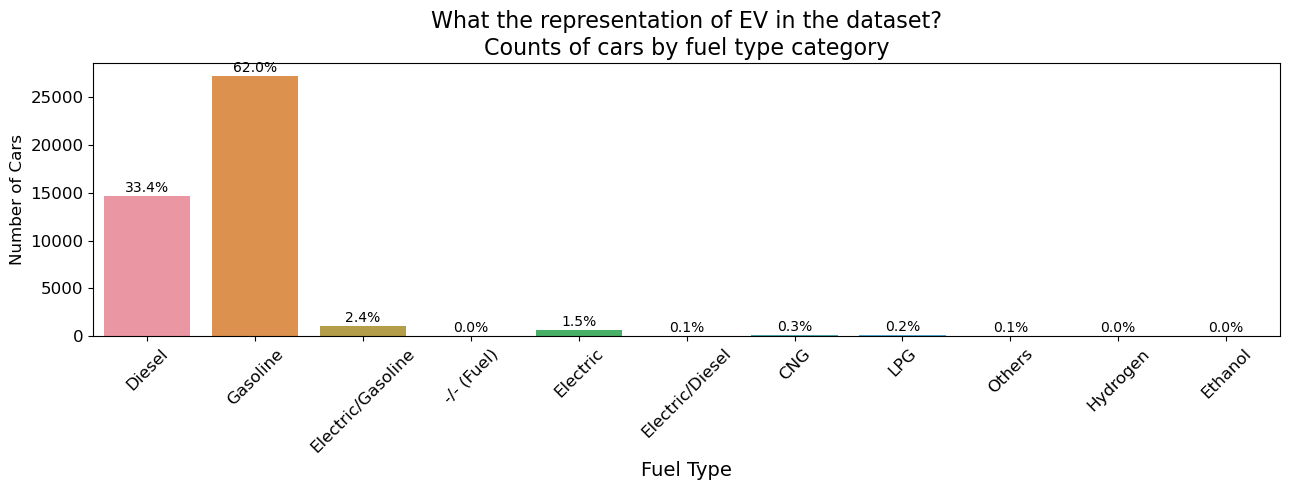

In [9]:
plt.figure(figsize=(13, 5))
fuel_count_plot = se.countplot(x=prestindf["fuel"])

plt.xticks(size=12)
plt.xlabel('Fuel Type', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What the representation of EV in the dataset?\nCounts of cars by fuel type category", size=16)

fuel_count_plot.set_xticklabels(fuel_count_plot.get_xticklabels(), rotation=45)

total = len(prestindf)
for p in fuel_count_plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fuel_count_plot.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

* Pure electric cars account for 1.5% of the cars in the dataset
* Hybrid cars are more represented electric/gasolin accounts for 2.4% 

> The general impression is that electric cars do't seem to be favourite for the german public. That statement is true for a period of time which explains the lower percentage. However, if we look at other forms of fuel we can see that perhaps the sentiment is changing in favour of EV.



### The fuel type trend yearly
This is for question 2

In [5]:
yearly_counts_df = pd.DataFrame(prestindf[["fuel", "year"]].groupby(["fuel", "year"]).size()).reset_index().rename(columns={0: 'counts'})

yearly_counts_df

,fuel,year,counts
0,-/- (Fuel),2011,1
1,-/- (Fuel),2012,2
2,-/- (Fuel),2013,2
3,-/- (Fuel),2014,2
4,-/- (Fuel),2015,4
...,...,...,...
94,Others,2017,1
95,Others,2018,8
96,Others,2019,7
97,Others,2020,2


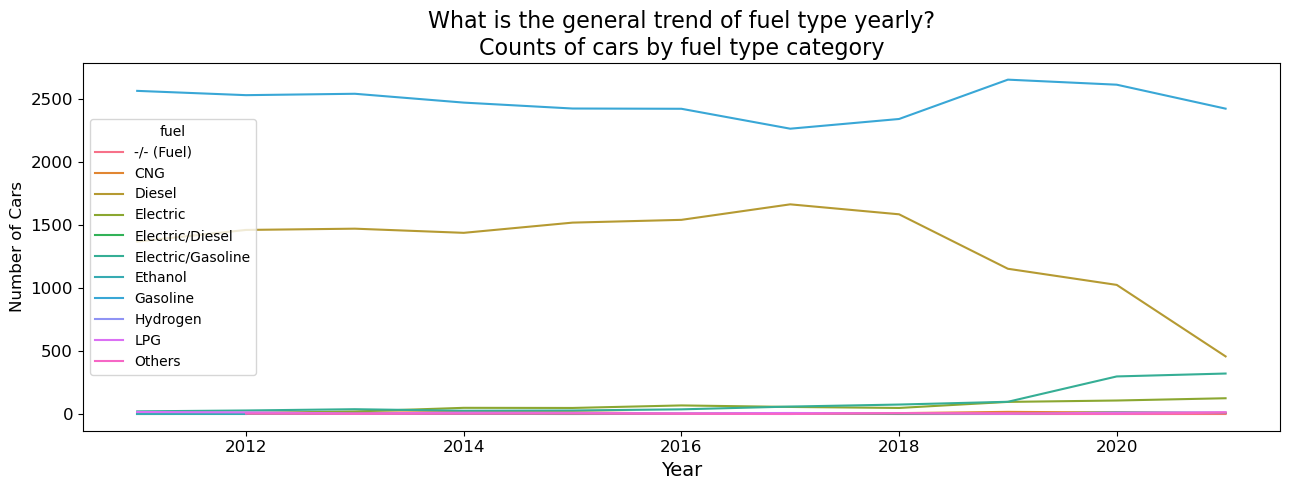

In [11]:
plt.figure(figsize=(13, 5))

plt.xticks(size=12)
plt.xlabel('Year', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What is the general trend of fuel type yearly?\nCounts of cars by fuel type category", size=16)

yearly_fueltyep_plot = se.lineplot(data=yearly_counts_df, x="year", y="counts", hue="fuel")
plt.tight_layout()
plt.show()

- Diesel in decline but gasoline not much
- Alternative fuel almost didn't move
- Electric and hybrid gaining momentum after 2018

### What is the trend of EV cars sales look yearly?

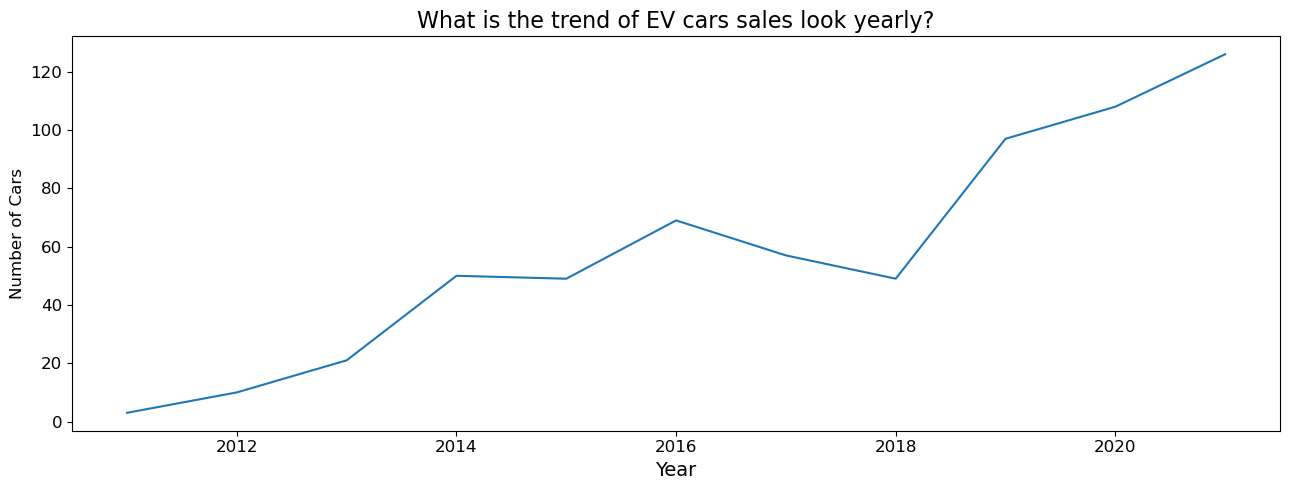

In [12]:
plt.figure(figsize=(13, 5))

plt.xticks(size=12)
plt.xlabel('Year', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What is the trend of EV cars sales look yearly?", size=16)

yearly_ev_plot = se.lineplot(data=yearly_counts_df.loc[yearly_counts_df["fuel"]== "Electric"], x="year", y="counts")
plt.tight_layout()
plt.show()

### What is the trend of hybrid vs EV cars sales look yearly?

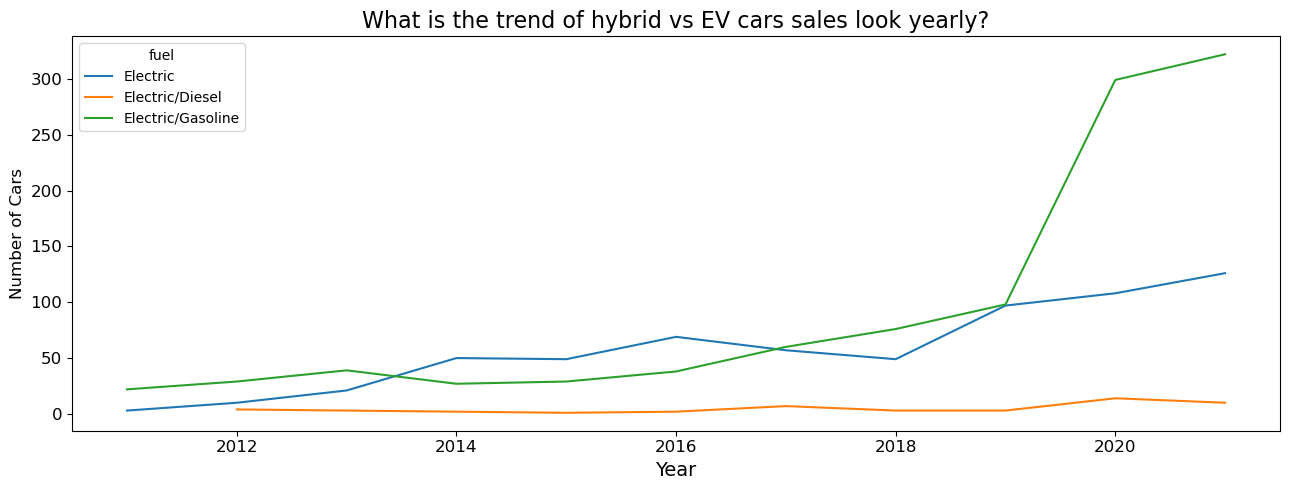

In [18]:
plt.figure(figsize=(13, 5))

plt.xticks(size=12)
plt.xlabel('Year', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What is the trend of hybrid vs EV cars sales look yearly?", size=16)

yearly_all_ev_plot = se.lineplot(data=yearly_counts_df.loc[(yearly_counts_df["fuel"]== "Electric") | ( yearly_counts_df["fuel"]== "Electric/Gasoline") | ( yearly_counts_df["fuel"]== "Electric/Diesel")], x="year", y="counts", hue="fuel")
plt.tight_layout()
plt.show()

## let's add the dimension of offerType to get a better idea on new vs secondhand market

In [19]:
ycond_counts_df = pd.DataFrame(prestindf[["fuel", "year", "offerType"]].groupby(["fuel", "year", "offerType"]).size()).reset_index().rename(columns={0: 'counts'})

ycond_counts_df

,fuel,year,offerType,counts
0,-/- (Fuel),2011,Used,1
1,-/- (Fuel),2012,Used,2
2,-/- (Fuel),2013,Used,2
3,-/- (Fuel),2014,Used,2
4,-/- (Fuel),2015,Used,4
...,...,...,...,...
172,Others,2019,Demonstration,1
173,Others,2019,Used,6
174,Others,2020,Used,2
175,Others,2021,Demonstration,4


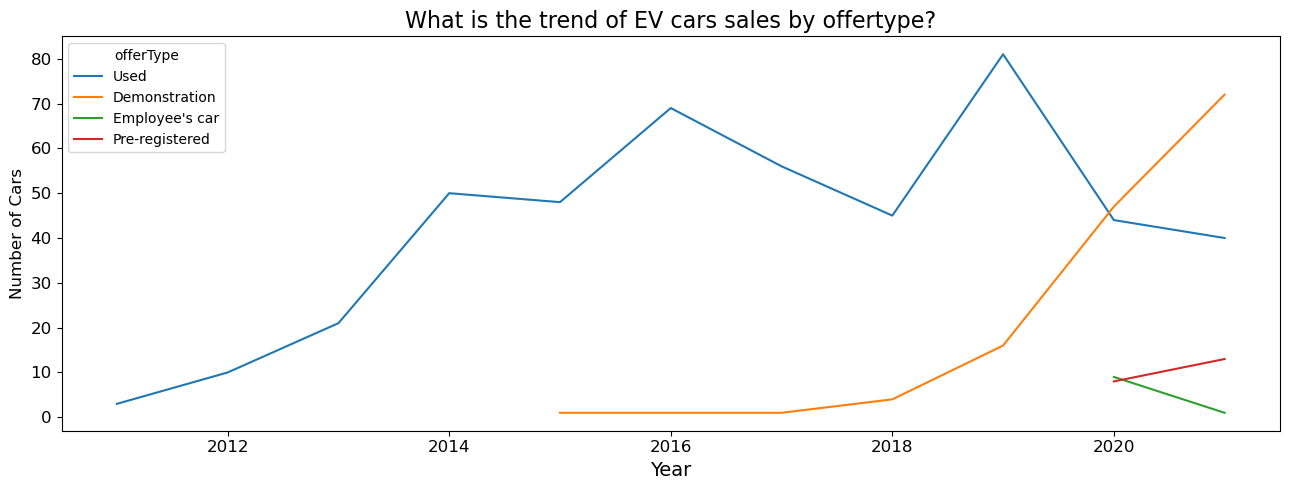

In [21]:
plt.figure(figsize=(13, 5))

plt.xticks(size=12)
plt.xlabel('Year', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What is the trend of EV cars sales by offertype?", size=16)

ycond_ev_plot = se.lineplot(data=ycond_counts_df.loc[ycond_counts_df["fuel"]== "Electric"], x="year", y="counts", hue="offerType")
plt.tight_layout()
plt.show()

- Eletric second hand car is going through a cool down period
- Demonistration (I don't what does it refer to), but that is growing exponentially

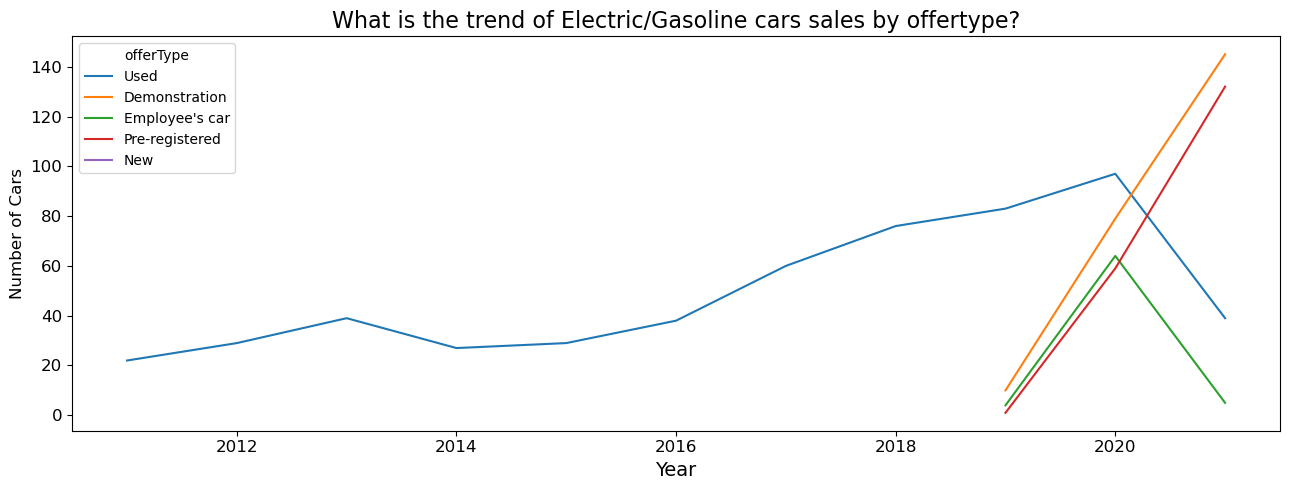

In [22]:
plt.figure(figsize=(13, 5))

plt.xticks(size=12)
plt.xlabel('Year', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What is the trend of Electric/Gasoline cars sales by offertype?", size=16)

ycond_hybridgaso_plot = se.lineplot(data=ycond_counts_df.loc[ycond_counts_df["fuel"]== "Electric/Gasoline"], x="year", y="counts", hue="offerType")
plt.tight_layout()
plt.show()

- Pre-registered cars are in metioric rise from 2019 on wards
- Used cars are in surprising decline post 2020 (could this be related to covid19 impact)
- Employee's cars also sky rocketed from 2019 and hit a turning point in 2020 to decline again

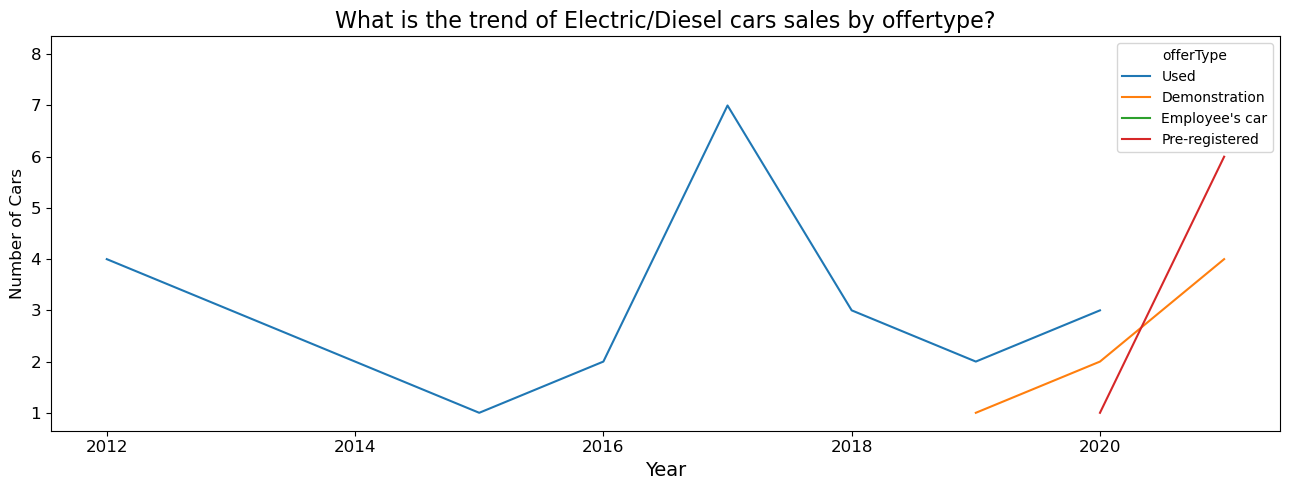

In [23]:
plt.figure(figsize=(13, 5))

plt.xticks(size=12)
plt.xlabel('Year', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Cars', size=12)
plt.title("What is the trend of Electric/Diesel cars sales by offertype?", size=16)

ycond_hybriddies_plot = se.lineplot(data=ycond_counts_df.loc[ycond_counts_df["fuel"]== "Electric/Diesel"], x="year", y="counts", hue="offerType")
plt.tight_layout()
plt.show()

- The only offers that are growing are pre-registered and demo
- Used cars were in steep decline since 2017 but seems to slighlt grow from 2019 onwards

## Findings and Recommendations
- EV cars are in steady growth in terms of sales
- Hybrid Diesel is limited and has stagnant growth (it might be good for certain sectors but not to the general public)
- Hybrid Gasoline is in steady growth that became exponential after 2018
- The EV and Hybrid Gasoline are you best bet for growth as sales trend is only going up
- The avoid the Diesel cars, their sales falling and they will be replaced by hybrid twin or completely electric
- The Gasoline cars are BAU however the prolifiration of charging stations my incentify more people to opt out and buy EVs 